In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
df = pd.read_csv('datasets/daily_houston_data.csv').dropna()

<AxesSubplot:>

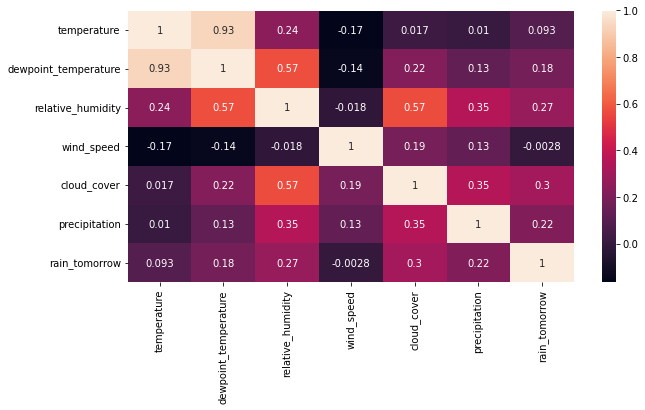

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

In [19]:
df.rain_tomorrow.value_counts()

0    5049
1    1525
Name: rain_tomorrow, dtype: int64

In [20]:
resampler =  RandomOverSampler(sampling_strategy='minority', random_state=42)

In [21]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [22]:
input_cols = [
                'temperature',
                'dewpoint_temperature',
                'relative_humidity',
                'cloud_cover',  
                'wind_speed'
]

In [23]:
x_train = train[input_cols]
y_train = train[['precipitation']]

In [24]:
x_test = test[input_cols]
y_test = test[['precipitation']]

In [25]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.predict(x_test)

array([[ 7.47954129],
       [ 1.43969836],
       [-5.28854661],
       ...,
       [ 6.65992734],
       [-0.11946885],
       [ 4.26939799]])

In [27]:
print('Score: {:.2f}'.format(model.score(x_train,y_train)*100))

Score: 19.49


In [28]:
print('Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Score: 18.66
